# Stats Project: Predicting and Analyzing Risk of Lending Club Clients

##### Source of Data:  https://www.kaggle.com/wendykan/lending-club-loan-data

In [1]:
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import numpy as np
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder

### Metadata

- annual_inc:	The self-reported annual income provided by the borrower during registration.
- annual_inc_joint:	The combined self-reported annual income provided by the co-borrowers during registration
- application_type:	Indicates whether the loan is an individual application or a joint application with two co-borrowers
- collections_12_mths_ex_med:	Number of collections in 12 months excluding medical collections
- delinq_2yrs:	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- desc:	Loan description provided by the borrower
- dti:	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- dti_joint:	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income
- emp_length:	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- emp_title:	The job title supplied by the Borrower when applying for the loan.*
- funded_amnt:	The total amount committed to that loan at that point in time.
- funded_amnt_inv:	The total amount committed by investors for that loan at that point in time.
- grade:	Lending Club assigned loan grade
- home_ownership:	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- initial_list_status:	The initial listing status of the loan. Possible values are – W, F
- inq_last_6mths:	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- installment:	The monthly payment owed by the borrower if the loan originates.
- int_rate:	Interest Rate on the loan
- is_inc_v:	Indicates if income was verified by LC, not verified, or if the income source was verified
- last_credit_pull_d:	The most recent month LC pulled credit for this loan
- last_pymnt_amnt:	Last total payment amount received
- loan_status:	Current status of the loan
- mths_since_last_delinq:	The number of months since the borrower's last delinquency.
- mths_since_last_major_derog:	Months since most recent 90-day or worse rating
- mths_since_last_record:	The number of months since the last public record.
- next_pymnt_d:	Next scheduled payment date
- open_acc:	The number of open credit lines in the borrower's credit file.
- out_prncp:	Remaining outstanding principal for total amount funded
- out_prncp_inv:	Remaining outstanding principal for portion of total amount funded by investors
- pub_rec:	Number of derogatory public records
purpose	A category provided by the borrower for the loan request. 
- pymnt_plan:	Indicates if a payment plan has been put in place for the loan
- recoveries:	post charge off gross recovery
- revol_bal:	Total credit revolving balance
- revol_util:	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- term:	The number of payments on the loan. Values are in months and can be either 36 or 60.
- total_acc:	The total number of credit lines currently in the borrower's credit file
- total_pymnt:	Payments received to date for total amount funded
- total_pymnt_inv:	Payments received to date for portion of total amount funded by investors
- total_rec_int:	Interest received to date
- total_rec_late_fee:	Late fees received to date
- total_rec_prncp:	Principal received to date
- verified_status_joint:	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
- open_acc_6m:	Number of open trades in last 6 months
- open_il_6m:	Number of currently active installment trades
- open_il_12m:	Number of installment accounts opened in past 12 months
- open_il_24m:	Number of installment accounts opened in past 24 months
- mths_since_rcnt_il:	Months since most recent installment accounts opened
- total_bal_il:	Total current balance of all installment accounts
- il_util:	Ratio of total current balance to high credit/credit limit on all install acct
- open_rv_12m:	Number of revolving trades opened in past 12 months
- open_rv_24m:	Number of revolving trades opened in past 24 months
- max_bal_bc:	Maximum current balance owed on all revolving accounts
- all_util:	Balance to credit limit on all trades
- total_rev_hi_lim:  	Total revolving high credit/credit limit
- inq_fi:	Number of personal finance inquiries
- total_cu_tl:	Number of finance trades
- inq_last_12m:	Number of credit inquiries in past 12 months
- acc_now_delinq:	The number of accounts on which the borrower is now delinquent.
- tot_coll_amt:	Total collection amounts ever owed
- tot_cur_bal:	Total current balance of all accounts

In [113]:
df_loan=pd.read_csv("/Users/bismabutt/Desktop/DataScience /U OF T/Stats/Term Project/loan.csv")

In [114]:
list(df_loan)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

## Part I: Data Exploration

In this section of our code, we will explore the data. Firstly, we need to understand what variables are included within the data.. what is the data? What variables can we compare against one another to learn more about the data?

This section will also include visualization of the data. This will help to assist our exploration and really dig deep and understand the underlying data trends that are not visible when viewing a dataframe. 

### We will explore the following: 

###### Loans Issued 

###### Job Title
- Number of loans issued per Job Title 
- Job titles versus Defaulting
- Job titles versus value of loan (Job titles granted most valuables loans may be riskiest)
###### Interest Rate 
- Interest rate versus Grade
- Interest rate versus Defaulting
- Amount funded for Charged-off/Other Default Accounts?
- Annual Income versus funded amount and interest rate
###### State of Residence 
- State versus loans issued 
- State versus default loans
###### Individual/Joint Loan
- Loan type versus interest rate
- Loan type versus default status


In [115]:
#FIRST we must split the dataset 
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df_loan, test_size=0.25, random_state=42123)

In [116]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


The dataset has 887379 rows × 74 columns. This is a lot of information and we do not necessarily need all of it so let's delete some columns that we know are completely useless to our analysis. 

###### Explanation for dropping certain variables/columns 

subgrade - Extra information, we already have grade 

desc - too much text, we cannot convert this into anything useful

title - Same as 'purpose' but has more detail

zip_code - last few characters are not shown, not useful to us

In [117]:
df_loan.head(100)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_loan.drop(['url', 'desc', 'policy_code', 'sub_grade', 'member_id', 'title', 'open_rv_12m', 'open_rv_24m',
              'total_cu_tl', 'mths_since_rcnt_il', 'collection_recovery_fee', 'earliest_cr_line',
              'total_rec_late_fee', 'recoveries', 'next_pymnt_d', 'max_bal_bc',
             'total_rec_prncp', 'last_credit_pull_d','out_prncp_inv', 'out_prncp', 
              'acc_now_delinq', 'all_util', 'total_rev_hi_lim' ], axis = 1, inplace = True)

In [7]:
#Checking number of columns dropped
df_loan.shape 

(887379, 51)

We will only explore and analyze data from 2010-2015 (In order to minimize our data points)

In [8]:
df_loan['issue_month'], df_loan['issue_year'] = df_loan['issue_d'].str.split('-', 1).str
df_loan['issue_date'] = df_loan['issue_d']
#Now we have columns, Issue_month, Issue_year, issue_date at the end of the DF

In [9]:
# Run this function After
df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'])
df_loan['issue_d'].dtypes

dtype('<M8[ns]')

In [10]:
df_loan.index = df_loan['issue_d']
#del df_loan['issue_d']
df_loan_dt = df_loan['2010-01-01': '2015-12-01']
# DO NOT RUN THIS UNTIL CONFIRMED COLUMNS df_loan_dt.dropna
print "before:", df_loan.shape
print "after:", df_loan_dt.shape

before: (887379, 54)
after: (879102, 54)


Seems like majority of our dataset is from those 5 years, so dropping three years did not make a significant difference on the number of rows

Now let's plot the trend of loans granted throughout the years, Loan amount vs issue date

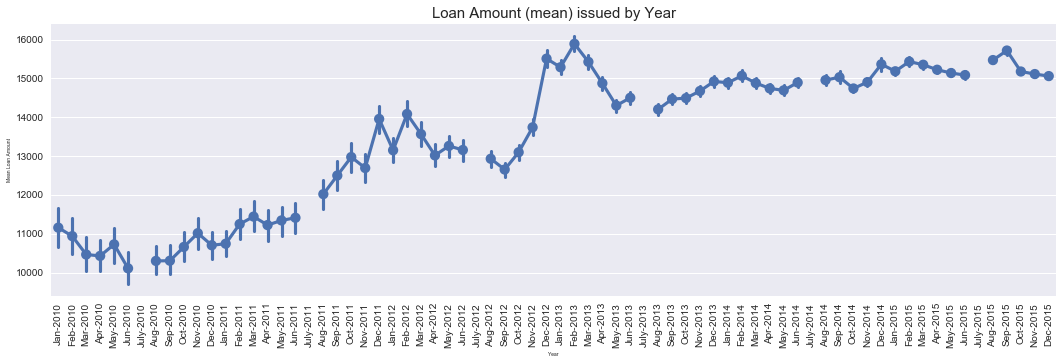

In [90]:
plt.figure(figsize = (18,5))
g = sns.pointplot(x='issue_date', y='loan_amnt', 
                  data=df_loan_dt[df_loan_dt['issue_date'] >= '2009'],
                 order =['Jan-2010', 'Feb-2010', 'Mar-2010', 'Apr-2010', 'May-2010', 'Jun-2010',
                         'July-2010', 'Aug-2010', 'Sep-2010', 'Oct-2010', 'Nov-2010', 'Dec-2010',
                         'Jan-2011', 'Feb-2011', 'Mar-2011', 'Apr-2011', 'May-2011', 'Jun-2011',
                         'July-2011', 'Aug-2011', 'Sep-2011', 'Oct-2011', 'Nov-2011', 'Dec-2011',
                         'Jan-2012', 'Feb-2012', 'Mar-2012', 'Apr-2012', 'May-2012', 'Jun-2012',
                         'July-2012', 'Aug-2012', 'Sep-2012', 'Oct-2012', 'Nov-2012', 'Dec-2012',
                         'Jan-2013', 'Feb-2013', 'Mar-2013', 'Apr-2013', 'May-2013', 'Jun-2013',
                         'July-2013', 'Aug-2013', 'Sep-2013', 'Oct-2013', 'Nov-2013', 'Dec-2013',
                        'Jan-2014', 'Feb-2014', 'Mar-2014', 'Apr-2014', 'May-2014', 'Jun-2014',
                         'July-2014', 'Aug-2014', 'Sep-2014', 'Oct-2014', 'Nov-2014', 'Dec-2014',
                        'Jan-2015', 'Feb-2015', 'Mar-2015', 'Apr-2015', 'May-2015', 'Jun-2015',
                         'July-2015', 'Aug-2015', 'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015'])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Year", fontsize=5)
g.set_ylabel("Mean Loan Amount", fontsize=5)
g.set_title("Loan Amount (mean) issued by Year", fontsize=15)
plt.show()

Seems as though the mean loan amount ($) has increased over the years, but this could be due to the fact that their clientelle is increasing. Let's plot how their clientelle has increased over the years. 

In [12]:
df_count = df_loan_dt.groupby('issue_d')['id'].nunique()
df_count.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

'issue_d' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version



issue_d
2010-01-01    662
2010-02-01    682
2010-03-01    828
2010-04-01    912
2010-05-01    989
Name: id, dtype: int64

Below plot shows the growth of the company overtime. Number of loans that have been issued in the past several years

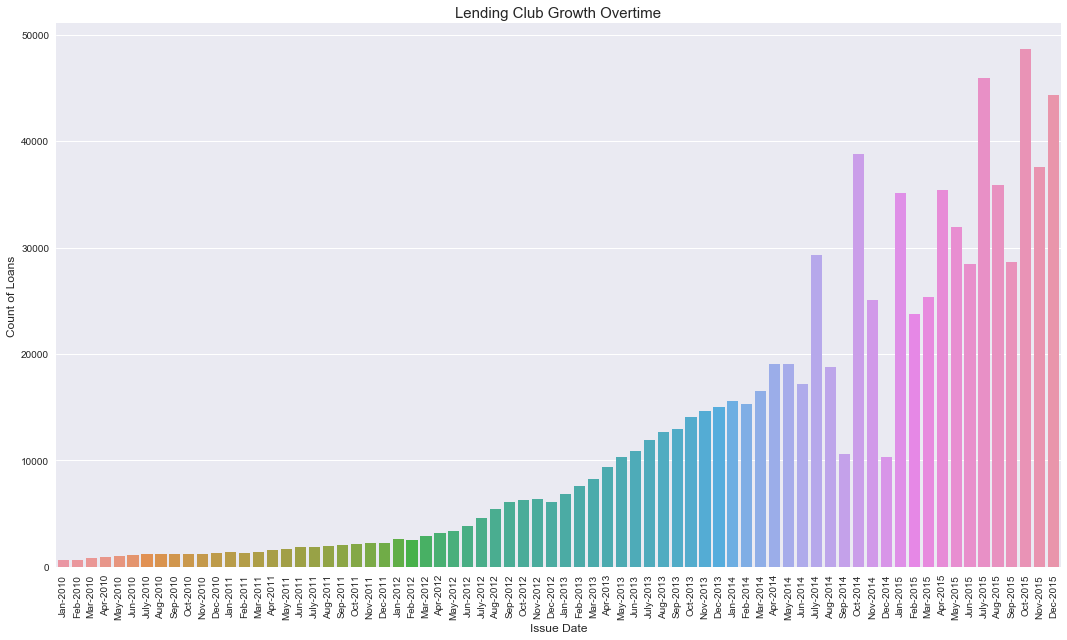

In [92]:
plt.figure(figsize = (18,10))
ax = sns.countplot(x='issue_d',
                  data=df_loan_dt[df_loan_dt['issue_year'] > '2009'],
                  order =['Jan-2010', 'Feb-2010', 'Mar-2010', 'Apr-2010', 'May-2010', 'Jun-2010',
                         'July-2010', 'Aug-2010', 'Sep-2010', 'Oct-2010', 'Nov-2010', 'Dec-2010',
                         'Jan-2011', 'Feb-2011', 'Mar-2011', 'Apr-2011', 'May-2011', 'Jun-2011',
                         'July-2011', 'Aug-2011', 'Sep-2011', 'Oct-2011', 'Nov-2011', 'Dec-2011',
                         'Jan-2012', 'Feb-2012', 'Mar-2012', 'Apr-2012', 'May-2012', 'Jun-2012',
                         'July-2012', 'Aug-2012', 'Sep-2012', 'Oct-2012', 'Nov-2012', 'Dec-2012',
                         'Jan-2013', 'Feb-2013', 'Mar-2013', 'Apr-2013', 'May-2013', 'Jun-2013',
                         'July-2013', 'Aug-2013', 'Sep-2013', 'Oct-2013', 'Nov-2013', 'Dec-2013',
                        'Jan-2014', 'Feb-2014', 'Mar-2014', 'Apr-2014', 'May-2014', 'Jun-2014',
                         'July-2014', 'Aug-2014', 'Sep-2014', 'Oct-2014', 'Nov-2014', 'Dec-2014',
                        'Jan-2015', 'Feb-2015', 'Mar-2015', 'Apr-2015', 'May-2015', 'Jun-2015',
                         'July-2015', 'Aug-2015', 'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel("Count of Loans", fontsize=12)
ax.set_xlabel("Issue Date", fontsize=12)
ax.set_title("Lending Club Growth Overtime", fontsize =15)

# Job Title
#### - Number of loans issued per Employment Length ✔ - Job titles versus Defaulting - Job Length vs Loans ✔
- what are top emp_titles for charged-off accounts? ✔

In [14]:
# Need to combine RN and Registered Nurse labels as they mean the same thing. 
df_loan_dt['emp_title'] = df_loan_dt['emp_title'].replace({'RN':'Registered Nurse'})
df_loan_dt['emp_title'] = df_loan_dt['emp_title'].replace({'manager':'Manager'})
df_loan_dt['emp_title'] = df_loan_dt['emp_title'].replace({'driver':'Driver'})
df_loan_dt['emp_title'] = df_loan_dt['emp_title'].replace({'supervisor':'Supervisor'})
df_loan_dt['emp_title'] = df_loan_dt['emp_title'].replace({'owner':'Owner'})

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versu

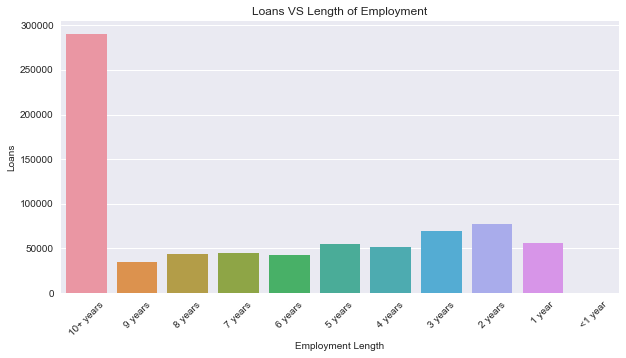

In [93]:
plt.figure(figsize=(10,5))
m = sns.countplot(x='emp_length',
                  data=df_loan_dt[df_loan_dt['issue_d'] > '2010-01-01'], 
                  order =['10+ years','9 years','8 years', '7 years', '6 years', '5 years', '4 years', '3 years',
                          '2 years','1 year', '<1 year'])
m.set_xticklabels(m.get_xticklabels(),rotation=45)
m.set_title("Loans VS Length of Employment", fontsize=12)
m.set_xlabel("Employment Length", fontsize=10)
m.set_ylabel("Loans", fontsize=10)

Manager             14378
Teacher             13469
Registered Nurse    10880
Owner                8225
Supervisor           6658
Driver               5998
Sales                4212
Project Manager      3988
Office Manager       3510
General Manager      3178
Name: emp_title, dtype: int64


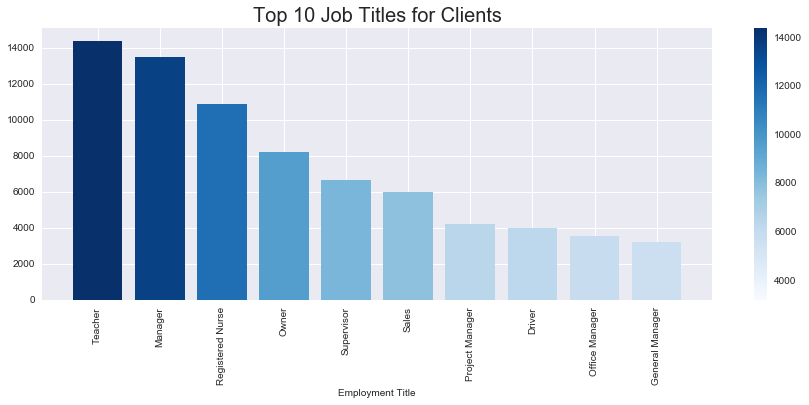

In [16]:
from matplotlib import cm

temp_title = df_loan_dt.emp_title.value_counts()
temp_title1 = temp_title.head(10)
print temp_title1

plt.figure(figsize=(15,5))
colors = cm.Blues(temp_title1 / float(max(temp_title1)))
plot = plt.scatter(temp_title1, temp_title1, c = temp_title1, cmap = 'Blues')
plt.clf()
plt.colorbar(plot)
plt.bar(range(len(temp_title1)), temp_title1, color = colors)
plt.xticks(np.arange(10), ('Teacher', 'Manager', 'Registered Nurse', 'Owner',
                           'Supervisor', 'Sales','Project Manager','Driver',
                          'Office Manager', 'General Manager'), rotation=90)
plt.title("Top 10 Job Titles for Clients", fontsize=20)
plt.xlabel("Employment Title", fontsize=10)
plt.show()

In [17]:
#Removed Current and Fully Paid as they were skewing the graph we were looking to create
#Graph would measure Emp title (top 10) versus current status 
df_temp=df_loan_dt[df_loan_dt.loan_status != 'Current']
df_temp=df_temp[df_temp.loan_status != 'Fully Paid']
df_temp.loan_status.unique()

array(['Charged Off', 'Default', 'Late (31-120 days)', 'In Grace Period',
       'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

###### Plotting the distribution of Funded Amounts ($)

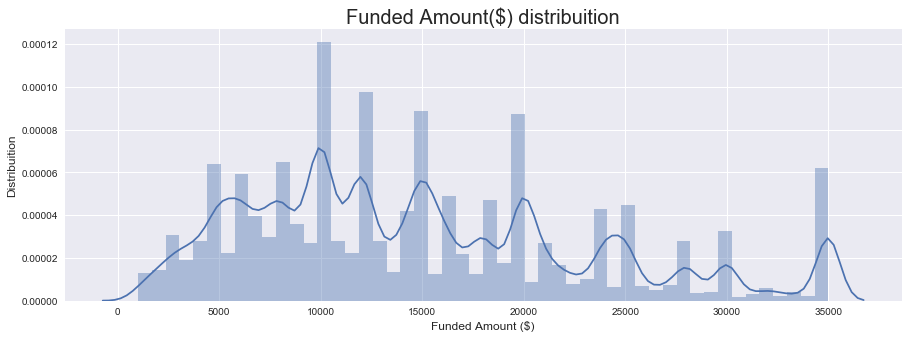

In [18]:
#convert "funded_amnt" into a numpy array and then use the plotly function to plot it as a distplot
#What is the mean for column "funded_amnt"? 14741
plt.figure(figsize=(15,5))
g = sns.distplot((df_loan_dt["funded_amnt"]))
g.set_xlabel("Funded Amount ($)", fontsize=12)
g.set_ylabel("Distribuition", fontsize=12)
g.set_title("Funded Amount($) distribuition", fontsize=20)

/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off' 'Issued']


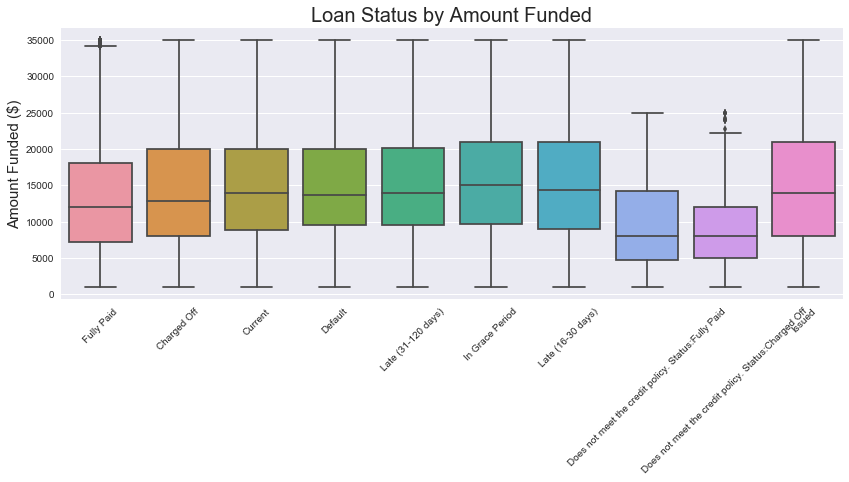

In [19]:
plt.figure(figsize = (14,5))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.boxplot(x='loan_status', y="funded_amnt",
                   data=df_loan_dt)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Amount Funded ($)", fontsize=15)
g.set_title("Loan Status by Amount Funded", fontsize=20)
print df_loan_dt.loan_status.unique()


#### TOP EMPLOYEE TITLES FOR CHARGED OFF ACCOUNTS

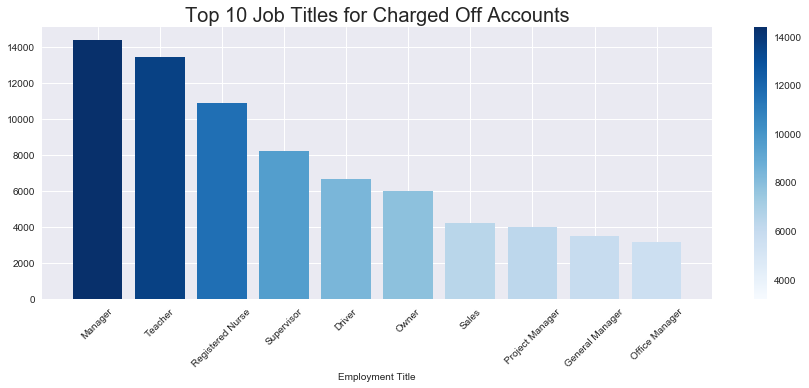

In [20]:
#Create DF for only Charged Off Accounts
df_CO = df_temp.loc[df_temp['loan_status'] == 'Charged Off']

emptitle_CO = df_CO.emp_title.value_counts()
emptitle_CO = emptitle_CO.head(10)

plt.figure(figsize=(15,5))
colors = cm.Blues(temp_title1 / float(max(temp_title1)))
plot = plt.scatter(temp_title1, temp_title1, c = temp_title1, cmap = 'Blues')
plt.clf()
plt.colorbar(plot)
plt.bar(range(len(temp_title1)), temp_title1, color = colors)
plt.xticks(np.arange(10), ('Manager','Teacher','Registered Nurse',
                            'Supervisor','Driver' ,'Owner','Sales', 'Project Manager','General Manager',
                          'Office Manager'), rotation=45)
plt.title("Top 10 Job Titles for Charged Off Accounts", fontsize=20)
plt.xlabel("Employment Title", fontsize=10)
plt.show()

# Interest Rate 
###### - Interest rate versus Grade✔ - Interest rate versus Defaulting✔ - Amount funded for Charged-off/Other Default Accounts✔

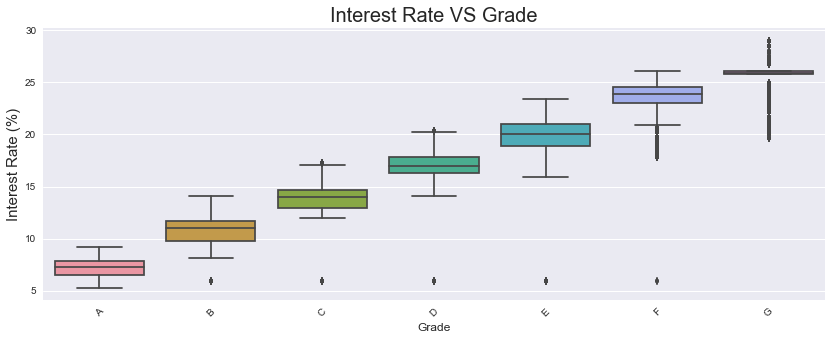

In [21]:
plt.figure(figsize = (14,5))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.boxplot(x='grade', y="int_rate",
                   data=df_loan_dt,
               order =['A','B','C','D','E', 'F', 'G'])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Grade", fontsize=12)
g.set_ylabel("Interest Rate (%)", fontsize=15)
g.set_title("Interest Rate VS Grade", fontsize=20)

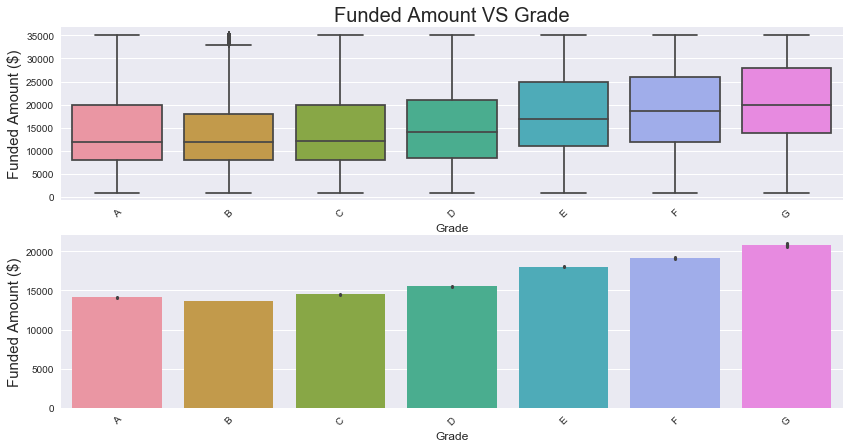

In [22]:
plt.figure(figsize = (14,7))
plt.subplot(211)
g = sns.boxplot(x='grade', y="funded_amnt",
                   data=df_loan_dt,
               order =['A','B','C','D','E', 'F', 'G'])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Grade", fontsize=12)
g.set_ylabel("Funded Amount ($)", fontsize=15)
g.set_title("Funded Amount VS Grade", fontsize=20)

plt.subplot(212)
g = sns.barplot(x='grade', y="funded_amnt",
                   data=df_loan_dt,
               order =['A','B','C','D','E', 'F', 'G'])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Grade", fontsize=12)
g.set_ylabel("Funded Amount ($)", fontsize=15)

This is very interesting. Those with low scores are usually granted a higher funded amount, typically at a higher interest rate as well. Let's pull the stats summaries for each letter grade

In [23]:
#Let's summarize the first, middle and last Grades
df_A = df_loan_dt.loc[df_loan_dt['grade'] == 'A']
df_D = df_loan_dt.loc[df_loan_dt['grade'] == 'D']
df_G = df_loan_dt.loc[df_loan_dt['grade'] == 'G']
print 'Grade A, D, G Summary Stats'
print "Min, Max, Mean Interest Rate for Grade A:"
print df_A["int_rate"].min(),',', df_A["int_rate"].max(),',', df_A["int_rate"].mean()

print "Min, Max, Mean Interest Rate for Grade D:"
print df_D["int_rate"].min(),',', df_D["int_rate"].max(),',', df_D["int_rate"].mean()


print "Min, Max, Mean Interest Rate for Grade G:"
print df_G["int_rate"].min(),',', df_G["int_rate"].max(),',', df_G["int_rate"].mean()

Grade A, D, G Summary Stats
Min, Max, Mean Interest Rate for Grade A:
5.32 , 9.25 , 7.22918030327
Min, Max, Mean Interest Rate for Grade D:
6.0 , 20.31 , 17.2039537795
Min, Max, Mean Interest Rate for Grade G:
19.66 , 28.99 , 25.8610502541


/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:588: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:816: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



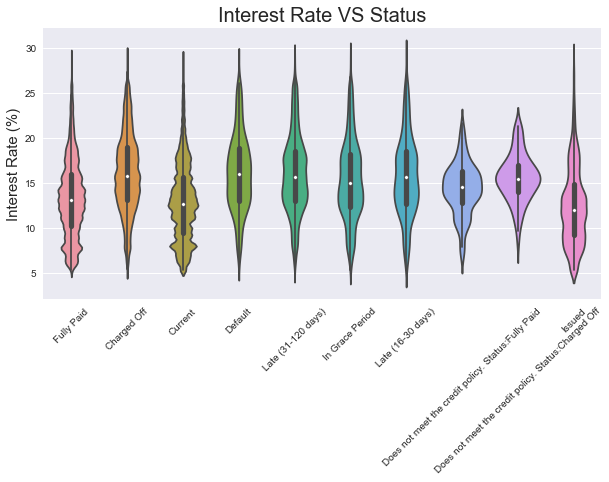

In [24]:
plt.figure(figsize = (10,5))
g = sns.violinplot(x='loan_status', y="int_rate",
                   data=df_loan_dt)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_ylabel("Interest Rate (%)", fontsize=15)
g.set_xlabel("", fontsize=15)
g.set_title("Interest Rate VS Status", fontsize=20)

In [25]:
# Finding Correlation Between the Numerical Variables 
print df_loan_dt['int_rate'].corr(df_loan_dt['funded_amnt'])
print df_loan_dt['int_rate'].corr(df_loan_dt['annual_inc'])

0.14383269849749997
-0.07362382967316664


#### Fixing training set

In [27]:
train = trainset  # drop labels for training set
#loan_labels = trainset["int_rate"].copy()

In [28]:
train.drop(['url', 'desc', 'policy_code', 'sub_grade', 'member_id', 'title', 'open_rv_12m', 'open_rv_24m',
              'total_cu_tl', 'mths_since_rcnt_il', 'collection_recovery_fee', 'earliest_cr_line',
              'total_rec_late_fee', 'recoveries', 'next_pymnt_d', 'max_bal_bc',
             'total_rec_prncp', 'last_credit_pull_d','out_prncp_inv', 'out_prncp', 
              'acc_now_delinq', 'all_util', 'total_rev_hi_lim', 'open_acc_6m', 'open_il_6m',
            'open_il_12m', 'open_il_24m','total_bal_il', 'il_util', 'inq_fi', 'inq_last_12m', 
            'mths_since_last_major_derog', 'verification_status_joint', 'annual_inc_joint', 'dti_joint', 'dti',
           'initial_list_status', "pub_rec", 'zip_code', 'emp_title', 'last_pymnt_d'], axis = 1, inplace = True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [29]:
#Avoiding making the issue_d as index bc we need a unique identifier
train['issue_d'] = pd.to_datetime(train['issue_d'])
train.index = train['issue_d']
train = train['2010-01-01': '2015-12-01']

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [30]:
train.index = train['id']
del train['id']
del train['issue_d']
train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,application_type,tot_coll_amt,tot_cur_bal
id,,,,,,,,,,,,,,,,,,,,,
13246625,5000.0,5000.0,5000.0,36 months,12.49,167.25,B,3 years,RENT,61000.0,...,58.1,39.0,5750.350000,5750.35,750.35,2907.10,0.0,INDIVIDUAL,0.0,102412.0
662888,6000.0,6000.0,6000.0,60 months,10.37,128.58,B,5 years,MORTGAGE,90000.0,...,11.3,39.0,7666.657274,7666.66,1651.73,1374.96,0.0,INDIVIDUAL,NaN,NaN
33561524,15000.0,15000.0,15000.0,60 months,17.14,373.92,D,5 years,MORTGAGE,40000.0,...,38.3,22.0,3717.780000,3717.78,2014.44,373.92,0.0,INDIVIDUAL,0.0,17933.0
57326504,8000.0,8000.0,7950.0,36 months,8.18,251.36,B,8 years,OWN,72000.0,...,3.4,14.0,1253.160000,1245.33,255.52,251.36,0.0,INDIVIDUAL,0.0,6225.0
10097269,10000.0,10000.0,9950.0,36 months,12.85,336.22,B,10+ years,MORTGAGE,60000.0,...,60.2,24.0,8069.190000,8028.84,1836.46,336.22,0.0,INDIVIDUAL,0.0,137839.0


In [31]:
train_set = train.drop("grade", axis=1) 
loan_labels = train["grade"].copy()

print train_set.shape
print loan_labels.shape

(659288, 30)
(659288,)


In [32]:
 #Checking to see if there are NaN values in categorical data before we factorize it
train.isnull().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
emp_length                     33601
home_ownership                     0
annual_inc                         0
verification_status                0
loan_status                        0
pymnt_plan                         0
purpose                            0
addr_state                         0
delinq_2yrs                        0
inq_last_6mths                     0
mths_since_last_delinq        337722
mths_since_last_record        558077
open_acc                           0
revol_bal                          0
revol_util                       335
total_acc                          0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_int                      0
last_pymnt_amnt                    0
c

##### Categorical columns to factorize then fill NaN values with 
- emp_length

##### Numerical columns to fill with mean/median/mode values 
- mths_since_last_delinq
- mths_since_last_record
- revol_util
- last_pymt_d
- tot_coll_amt
- tot_cur_bal

#### Print Unique Values for each Column you will use for the Learning

In [33]:
# Trying to find any duplicate values
print "TERM:", train.term.unique()
print 
print "EMPLOYMENT LENGTH:", train.emp_length.unique()
print 
print "HOME OWNERSHIP STATUS:", train.home_ownership.unique()
print 
print "APPLICATION TYPE:", train.application_type.unique()
print 
print "VERIFICATION STATUS:", train.verification_status.unique()
print 
print "LOAN STATUS:", train.loan_status.unique()
print
print "PAYMENT PLAN:", train.pymnt_plan.unique()
print
print "PURPOSE:", train.purpose.unique()

TERM: [' 36 months' ' 60 months']

EMPLOYMENT LENGTH: ['3 years' '5 years' '8 years' '10+ years' '4 years' '< 1 year' '6 years'
 '1 year' '9 years' nan '2 years' '7 years']

HOME OWNERSHIP STATUS: ['RENT' 'MORTGAGE' 'OWN' 'NONE' 'OTHER' 'ANY']

APPLICATION TYPE: ['INDIVIDUAL' 'JOINT']

VERIFICATION STATUS: ['Not Verified' 'Source Verified' 'Verified']

LOAN STATUS: ['Fully Paid' 'Late (31-120 days)' 'Current' 'Charged Off'
 'In Grace Period' 'Issued'
 'Does not meet the credit policy. Status:Charged Off' 'Late (16-30 days)'
 'Default' 'Does not meet the credit policy. Status:Fully Paid']

PAYMENT PLAN: ['n' 'y']

PURPOSE: ['credit_card' 'car' 'debt_consolidation' 'medical' 'other'
 'home_improvement' 'major_purchase' 'small_business' 'vacation'
 'renewable_energy' 'wedding' 'moving' 'house' 'educational']


##### Need to fill in information with the sklearn imputer function & factorize the following variables: term, emp_length, home_ownership, application_type, verification_status, loan_status, pymnt_plan and purpose

In [34]:
#Remove letters from emp_length
train['emp_length'] = train['emp_length'].map(lambda x: str(x)[:2])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [35]:
#Designate emp_length as a numerical column
train['emp_length']= pd.to_numeric(train['emp_length'], errors='coerce')
train.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,application_type,tot_coll_amt,tot_cur_bal
id,,,,,,,,,,,,,,,,,,,,,
13246625,5000.0,5000.0,5000.0,36 months,12.49,167.25,B,3.0,RENT,61000.0,...,58.1,39.0,5750.350000,5750.35,750.35,2907.10,0.0,INDIVIDUAL,0.0,102412.0
662888,6000.0,6000.0,6000.0,60 months,10.37,128.58,B,5.0,MORTGAGE,90000.0,...,11.3,39.0,7666.657274,7666.66,1651.73,1374.96,0.0,INDIVIDUAL,NaN,NaN
33561524,15000.0,15000.0,15000.0,60 months,17.14,373.92,D,5.0,MORTGAGE,40000.0,...,38.3,22.0,3717.780000,3717.78,2014.44,373.92,0.0,INDIVIDUAL,0.0,17933.0
57326504,8000.0,8000.0,7950.0,36 months,8.18,251.36,B,8.0,OWN,72000.0,...,3.4,14.0,1253.160000,1245.33,255.52,251.36,0.0,INDIVIDUAL,0.0,6225.0
10097269,10000.0,10000.0,9950.0,36 months,12.85,336.22,B,10.0,MORTGAGE,60000.0,...,60.2,24.0,8069.190000,8028.84,1836.46,336.22,0.0,INDIVIDUAL,0.0,137839.0


### Working with Categorical Variables

In [36]:
#Not using the below bc we need to run categorical encoder on each category separately
#train_cat= train.select_dtypes(exclude=['floating'])
tr_cat_home= train["home_ownership"]
tr_cat_loan = train['loan_status']
tr_cat_term = train['term']
tr_cat_empl = train['emp_length']
tr_cat_purp = train['purpose']
tr_cat_plan = train['pymnt_plan']
tr_cat_ver = train['verification_status']
tr_cat_app = train['application_type']

In [37]:
home_encoded, tr_cathome = tr_cat_home.factorize()
loan_encoded, tr_catloan = tr_cat_loan.factorize()
term_encoded, tr_catterm = tr_cat_term.factorize()
empl_encoded, tr_catempl = tr_cat_empl.factorize()
purp_encoded, tr_catpurp = tr_cat_purp.factorize()
plan_encoded, tr_catplan = tr_cat_plan.factorize()
ver_encoded, tr_catver = tr_cat_ver.factorize()
app_encoded, tr_catapp = tr_cat_app.factorize()

In [38]:
home = pd.DataFrame(home_encoded) 
home.columns = ['home_ownership']

loan = pd.DataFrame(loan_encoded) 
loan.columns = ['loan_status']

term = pd.DataFrame(term_encoded) 
term.columns = ['term']

empl = pd.DataFrame(empl_encoded) 
empl.columns = ['employment_status']

purp = pd.DataFrame(purp_encoded) 
purp.columns = ['purpose']

plan = pd.DataFrame(plan_encoded) 
plan.columns = ['pymnt_plan']

ver = pd.DataFrame(ver_encoded) 
ver.columns = ['verification_status']

app = pd.DataFrame(app_encoded) 
app.columns = ['app_type']

### Working with Numerical Variables

In [39]:
train_num = train.select_dtypes(exclude=['object'])
train_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal
id,,,,,,,,,,,,,,,,,,,,,
13246625,5000.0,5000.0,5000.0,12.49,167.25,3.0,61000.0,1.0,2.0,23.0,...,12386.0,58.1,39.0,5750.350000,5750.35,750.35,2907.10,0.0,0.0,102412.0
662888,6000.0,6000.0,6000.0,10.37,128.58,5.0,90000.0,0.0,3.0,39.0,...,2750.0,11.3,39.0,7666.657274,7666.66,1651.73,1374.96,0.0,NaN,NaN
33561524,15000.0,15000.0,15000.0,17.14,373.92,5.0,40000.0,0.0,1.0,39.0,...,7047.0,38.3,22.0,3717.780000,3717.78,2014.44,373.92,0.0,0.0,17933.0
57326504,8000.0,8000.0,7950.0,8.18,251.36,8.0,72000.0,0.0,0.0,25.0,...,343.0,3.4,14.0,1253.160000,1245.33,255.52,251.36,0.0,0.0,6225.0
10097269,10000.0,10000.0,9950.0,12.85,336.22,10.0,60000.0,0.0,0.0,38.0,...,12765.0,60.2,24.0,8069.190000,8028.84,1836.46,336.22,0.0,0.0,137839.0


In [40]:
imputer = Imputer(strategy="median")
imputer.fit(train_num)
X = imputer.transform(train_num)

/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [41]:
train_numerical = pd.DataFrame(X, columns=train_num.columns,
                         index=list(train.index.values))
train_numerical.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal
13246625,5000.0,5000.0,5000.0,12.49,167.25,3.0,61000.0,1.0,2.0,23.0,...,12386.0,58.1,39.0,5750.350000,5750.35,750.35,2907.10,0.0,0.0,102412.0
662888,6000.0,6000.0,6000.0,10.37,128.58,5.0,90000.0,0.0,3.0,39.0,...,2750.0,11.3,39.0,7666.657274,7666.66,1651.73,1374.96,0.0,0.0,80600.0
33561524,15000.0,15000.0,15000.0,17.14,373.92,5.0,40000.0,0.0,1.0,39.0,...,7047.0,38.3,22.0,3717.780000,3717.78,2014.44,373.92,0.0,0.0,17933.0
57326504,8000.0,8000.0,7950.0,8.18,251.36,8.0,72000.0,0.0,0.0,25.0,...,343.0,3.4,14.0,1253.160000,1245.33,255.52,251.36,0.0,0.0,6225.0
10097269,10000.0,10000.0,9950.0,12.85,336.22,10.0,60000.0,0.0,0.0,38.0,...,12765.0,60.2,24.0,8069.190000,8028.84,1836.46,336.22,0.0,0.0,137839.0


In [42]:
#Resetting the index from the above ^ 
loan_train_num = pd.DataFrame(X, columns=train_num.columns)
loan_train_num.shape

(659288, 22)

### Creating the Pipelines: Numerical & Categorical 

In [43]:
#Categorical columns selector 
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, x, y=None):
        return self

    def transform(self, data_frame):
        return data_frame[self.column]

In [44]:
full_df = pd.concat([loan_train_num, home, loan, term, empl, purp,
                    plan, ver, app], axis=1)

In [45]:
full_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,tot_coll_amt,tot_cur_bal,home_ownership,loan_status,term,employment_status,purpose,pymnt_plan,verification_status,app_type
0,5000.0,5000.0,5000.0,12.49,167.25,3.0,61000.0,1.0,2.0,23.0,...,0.0,102412.0,0,0,0,0,0,0,0,0
1,6000.0,6000.0,6000.0,10.37,128.58,5.0,90000.0,0.0,3.0,39.0,...,0.0,80600.0,1,0,1,1,1,0,1,0
2,15000.0,15000.0,15000.0,17.14,373.92,5.0,40000.0,0.0,1.0,39.0,...,0.0,17933.0,1,1,1,1,2,0,1,0
3,8000.0,8000.0,7950.0,8.18,251.36,8.0,72000.0,0.0,0.0,25.0,...,0.0,6225.0,2,2,0,2,3,0,0,0
4,10000.0,10000.0,9950.0,12.85,336.22,10.0,60000.0,0.0,0.0,38.0,...,0.0,137839.0,1,2,0,3,2,0,1,0


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

pipeline_list = list(full_df)
pipeline= Pipeline([
    ('selector', DataFrameSelector(pipeline_list)),
    ('Imputer', Imputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [47]:
Pipeline_fit = pipeline.fit_transform(full_df)
Pipeline_fit.shape

(659288, 30)

### Select + Train Model

In [48]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression 

lr = linear_model.LogisticRegression()
lr.fit(Pipeline_fit, loan_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
some_data = full_df.iloc[:5]
some_labels = loan_labels.iloc[:5]
some_data_prep = pipeline.transform(some_data)

print("Predictions:", lr.predict(some_data_prep))

('Predictions:', array(['B', 'B', 'C', 'A', 'B'], dtype=object))


In [58]:
from sklearn.feature_selection import RFE

rfe = RFE(lr)
rfe = rfe.fit(some_data, some_labels)
print(rfe.support_)
print(rfe.ranking_)
print(rfe.support_).sum()

[ True  True  True  True  True False  True False False  True  True False
  True  True False  True  True  True  True False False  True False False
 False False False False False False]
[ 1  1  1  1  1  8  1 12  5  1  1  3  1  1  2  1  1  1  1 13 15  1 11  9
  4  7 10 14  6 16]
15


In [59]:
print "loan_amnt, funded_amnt, funded_amnt_inv, int_rate, installment, annual_inc, mths_since_last_delinq, mths_since_last_record, revol_bal, revol_utiltotal_pymnt ,total_pymnt_inv, total_rec_int, last_pymnt_amnt, tot_cur_bal"

loan_amnt, funded_amnt, funded_amnt_inv, int_rate, installment, annual_inc, mths_since_last_delinq, mths_since_last_record, revol_bal, revol_utiltotal_pymnt ,total_pymnt_inv, total_rec_int, last_pymnt_amnt, tot_cur_bal


In [60]:
col_list = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 
            'annual_inc', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_bal', 'revol_util','total_pymnt', 
            'total_pymnt_inv', 'total_rec_int', 'last_pymnt_amnt', 'tot_cur_bal']

In [61]:
df = full_df[col_list]
df.shape

(659288, 15)

In [62]:
pipeline_list2 = list(df)
pipeline2= Pipeline([
    ('selector', DataFrameSelector(pipeline_list2)),
    ('Imputer', Imputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [63]:
Pipeline_fit1 = pipeline2.fit_transform(df)
Pipeline_fit1.shape

(659288, 15)

### Without RFE

In [50]:
X_train, X_test, y_train, y_test = train_test_split(Pipeline_fit, loan_labels, test_size=0.3, random_state=0)

In [51]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
y_pred = lr.predict(X_test)
y_pred1 = lr.predict(full_df)
print('Accuracy:{:.2f}'.format(lr.score(X_test, y_test)))
print('Accuracy:{:.2f}'.format(lr.score(Pipeline_fit, loan_labels)))


Accuracy:0.69
Accuracy:0.69


### With RFE

In [68]:
X_tr, X_t, y_tr, y_t = train_test_split(Pipeline_fit1, loan_labels, test_size=0.3, random_state=0)

In [70]:
lr.fit(X_tr, y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
y_pred = lr.predict(X_t)
y_pred1 = lr.predict(df)
print('Accuracy:{:.2f}'.format(lr.score(X_t, y_t)))
print('Accuracy:{:.2f}'.format(lr.score(Pipeline_fit1, loan_labels)))

Accuracy:0.69
Accuracy:0.69


### Grid Search

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'C': [3, 10, 30], 'max_iter': [200]}
  ]

log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=3, return_train_score=True)
grid_search.fit(Pipeline_fit, loan_labels)

/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:715: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid=[{'C': [3, 10, 30], 'max_iter': [200]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [55]:
grid_search.best_params_

{'C': 30, 'max_iter': 200}

In [98]:
gb = grid_search.best_estimator_

In [54]:
 from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.692


### Testing Grid Search - Best Model

In [85]:
logr = linear_model.LogisticRegression(C=200000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
logr.fit(Pipeline_fit1, loan_labels)

LogisticRegression(C=200000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=500,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [86]:
logr.fit(X_tr, y_tr)

LogisticRegression(C=200000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=500,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [87]:
y_pred = logr.predict(X_t)
y_pred1 = logr.predict(df)
print('Accuracy:{:.2f}'.format(lr.score(X_t, y_t)))
print('Accuracy:{:.2f}'.format(lr.score(Pipeline_fit1, loan_labels)))

Accuracy:0.69
Accuracy:0.69


### Trying SVM Model - Support Vector Machines

### Applying BEST Grid Search

In [102]:
gb.fit(X_t, y_t)

LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
y_pred = logr.predict(X_t)
y_pred1 = logr.predict(df)
print('Accuracy:{:.2f}'.format(gb.score(X_t, y_t)))
print('Accuracy:{:.2f}'.format(gb.score(Pipeline_fit1, loan_labels)))

Accuracy:0.70
Accuracy:0.70


In [110]:
y_pred1

array(['A', 'A', 'F', ..., 'F', 'A', 'A'], dtype=object)